In [234]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
data = pd.read_csv('Data.csv')
print(data.head())
print(data.isnull().sum())  # Print the number of missing values per column
data = data.dropna() 


test_data = pd.read_csv('Test_data.csv')
print(test_data.head())
print(test_data.isnull().sum())  # Print the number of missing values per column
test_data = test_data.dropna() 

   time in seconds  SampleTimeFine     Euler_X    Euler_Y    Euler_Z  \
0         0.000000       837866162 -111.841042 -26.512457  47.947323   
1         0.008333       837874495 -111.906876 -26.519072  47.963295   
2         0.016666       837882828 -111.969544 -26.530798  47.985630   
3         0.024999       837891161 -112.023735 -26.542427  48.009979   
4         0.033332       837899494 -112.071121 -26.544016  48.038788   

      Acc_X     Acc_Y     Acc_Z     Gyr_X     Gyr_Y     Gyr_Z       Rcarz  
0  4.669657 -8.425480 -3.399575 -6.319800 -0.740533 -2.553176  990.097351  
1  4.650562 -8.538616 -3.541143 -5.410854 -2.317038 -1.906468  991.450378  
2  4.717082 -8.243590 -3.616767 -4.137724 -2.377539 -2.796511  992.852661  
3  4.645320 -8.465640 -3.471036 -3.565681 -2.921713 -2.803120  994.294312  
4  4.591832 -8.407206 -3.509645 -1.956569 -3.481615 -1.930391  995.764404  
time in seconds    0
SampleTimeFine     0
Euler_X            0
Euler_Y            0
Euler_Z            0
Acc_X 

                 time in seconds  SampleTimeFine   Euler_X   Euler_Y  \
time in seconds         1.000000        1.000000  0.587557  0.007447   
SampleTimeFine          1.000000        1.000000  0.587557  0.007447   
Euler_X                 0.587557        0.587557  1.000000 -0.141968   
Euler_Y                 0.007447        0.007447 -0.141968  1.000000   
Euler_Z                -0.549136       -0.549136 -0.869856 -0.088476   
Acc_X                   0.461037        0.461037  0.362995 -0.181678   
Acc_Y                   0.268147        0.268147  0.387336  0.122127   
Acc_Z                  -0.098811       -0.098811  0.220481 -0.260859   
Gyr_X                   0.143668        0.143668  0.143214  0.074086   
Gyr_Y                   0.051025        0.051025  0.061577  0.018151   
Gyr_Z                  -0.101194       -0.101194 -0.027947  0.035970   
Rcarz                  -0.086534       -0.086534 -0.283075  0.116066   

                  Euler_Z     Acc_X     Acc_Y     Acc_Z     Gyr

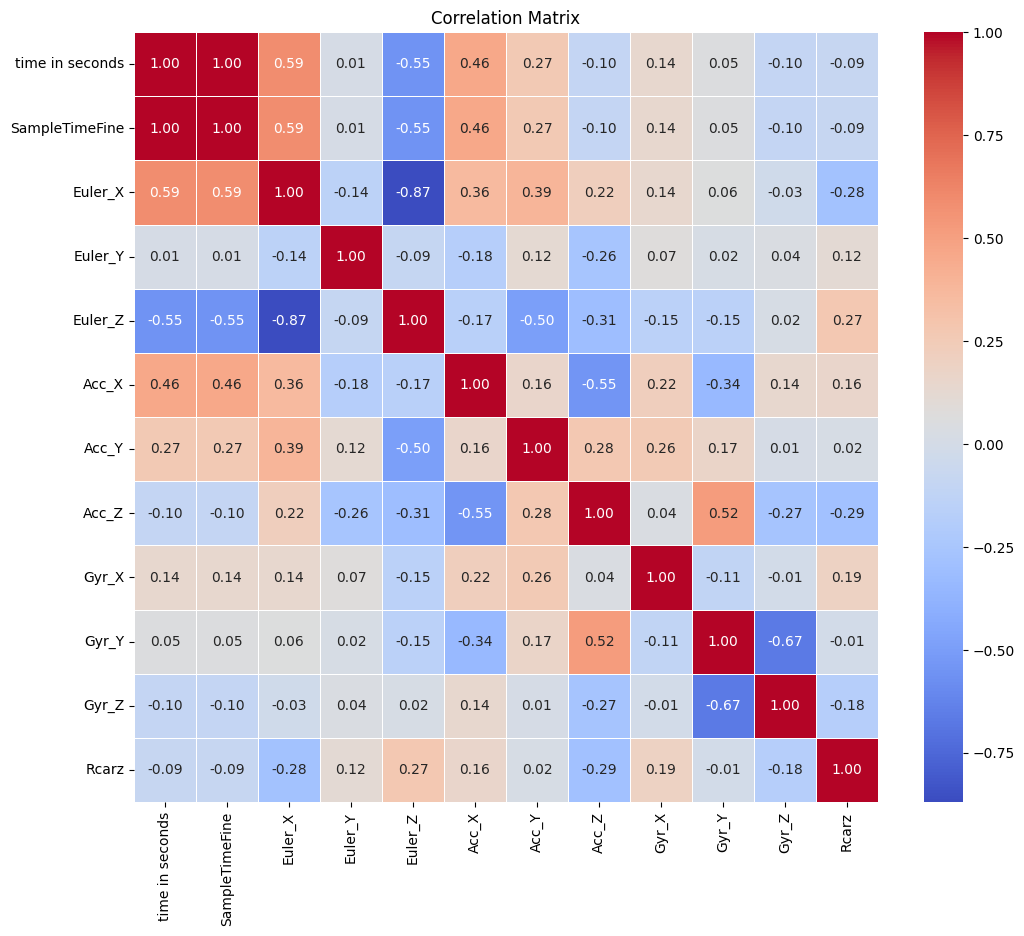

In [236]:
corr_matrix = data.corr()


print(corr_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [237]:
X_train= data[['time in seconds', 'SampleTimeFine', 'Euler_X', 'Euler_Y', 'Euler_Z', 
          'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']]
y_train = data['Rcarz']




In [238]:
X_test = test_data[['time in seconds', 'SampleTimeFine', 'Euler_X', 'Euler_Y', 'Euler_Z', 
          'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']]

y_test = test_data['Rcarz']
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [239]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [240]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 6.162138841336471e+32
Root Mean Squared Error: 2.482365573668889e+16


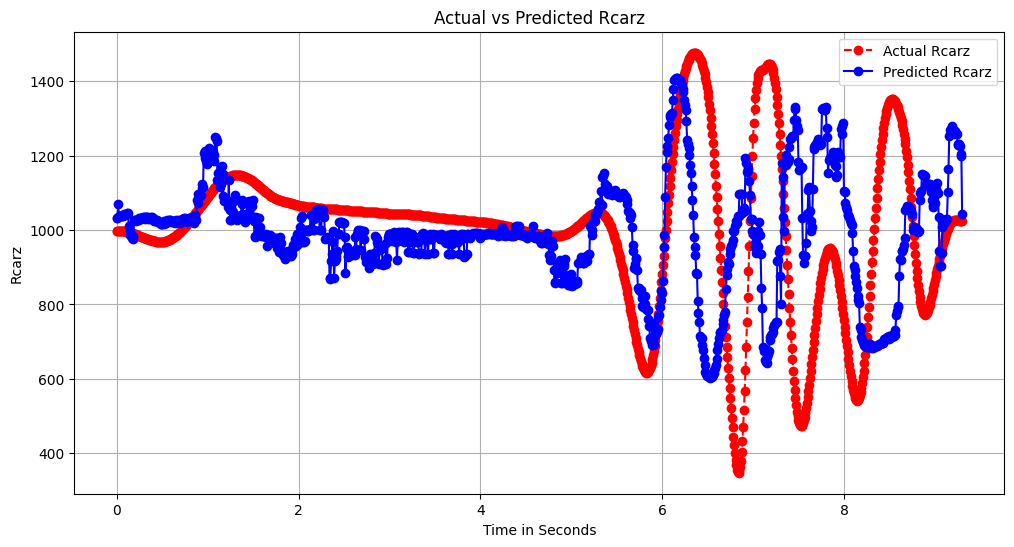

In [241]:
plot_data = pd.DataFrame({
    'time in seconds': test_data['time in seconds'].values,
    'Actual Rcarz': test_data['Rcarz'],
    'Predicted Rcarz': y_pred_rf
})

# Plot the trains
plt.figure(figsize=(12, 6))
plt.plot(plot_data['time in seconds'], plot_data['Actual Rcarz'], label='Actual Rcarz', color='red', marker='o', linestyle='--')
plt.plot(plot_data['time in seconds'], plot_data['Predicted Rcarz'], label='Predicted Rcarz', color='blue', marker='o', linestyle='-')
plt.xlabel('Time in Seconds')
plt.ylabel('Rcarz')
plt.title('Actual vs Predicted Rcarz')
plt.legend()
plt.grid(True)
plt.show()

In [231]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mse_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Random Forest R-squared: {r2_rf}")




Fitting 3 folds for each of 36 candidates, totalling 108 fits
Random Forest Mean Squared Error: 70288.69297323978
Root Mean Squared Error: 265.12014818425206
Random Forest R-squared: -0.704085990807678


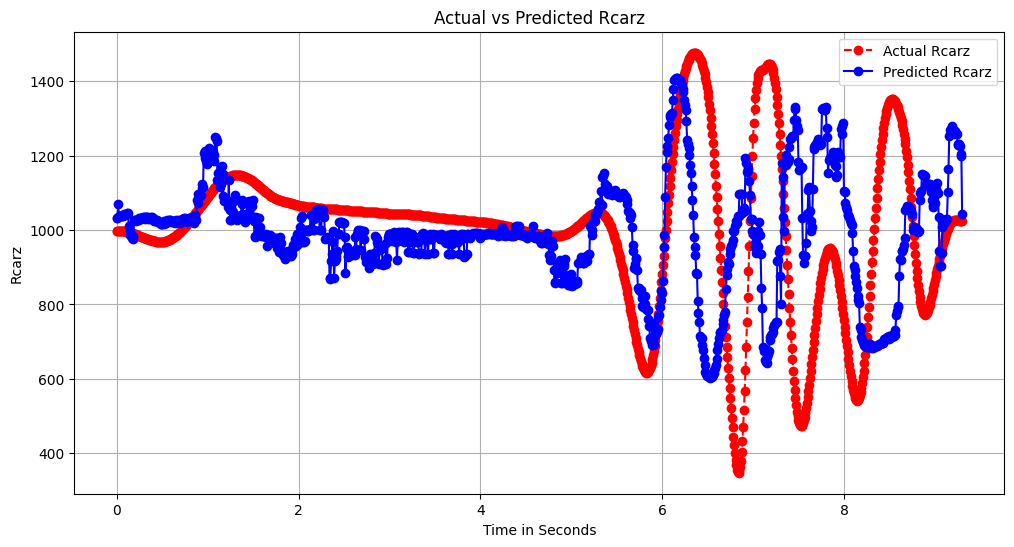

In [230]:
plot_data = pd.DataFrame({
    'time in seconds': test_data['time in seconds'].values,
    'Actual Rcarz': test_data['Rcarz'],
    'Predicted Rcarz': y_pred_rf
})

# Plot the trains
plt.figure(figsize=(12, 6))
plt.plot(plot_data['time in seconds'], plot_data['Actual Rcarz'], label='Actual Rcarz', color='red', marker='o', linestyle='--')
plt.plot(plot_data['time in seconds'], plot_data['Predicted Rcarz'], label='Predicted Rcarz', color='blue', marker='o', linestyle='-')
plt.xlabel('Time in Seconds')
plt.ylabel('Rcarz')
plt.title('Actual vs Predicted Rcarz')
plt.legend()
plt.grid(True)
plt.show()


In [196]:
# Function to convert Euler angles to a rotation matrix
def euler_to_rotation_matrix(roll, pitch, yaw):
    roll = np.deg2rad(roll)
    pitch = np.deg2rad(pitch)
    yaw = np.deg2rad(yaw)

    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(roll), -np.sin(roll)],
        [0, np.sin(roll), np.cos(roll)]
    ])
    
    R_y = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])
    
    R_z = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw), np.cos(yaw), 0],
        [0, 0, 1]
    ])
    
    R = R_z @ R_y @ R_x
    return R


In [197]:
global_Train_data = pd.read_csv('Data.csv')

# Initialize lists to store trains
global_acc_data = []
global_acc_data_minus_gravity = []

# Define gravity vector in global coordinate system
gravity_vector = np.array([0, 0, -9.80665])

for index, row in global_Train_data.iterrows():
    roll = row["Euler_X"]
    pitch = row["Euler_Y"]
    yaw = row["Euler_Z"]
    
    R = euler_to_rotation_matrix(roll, pitch, yaw)
    
    acc_device = np.array([row["Acc_X"], row["Acc_Y"], row["Acc_Z"]])

    acc_global = R @ acc_device

    acc_global_minus_gravity = acc_global - gravity_vector
    
    global_acc_data.append(acc_global)

    global_acc_data_minus_gravity.append(acc_global_minus_gravity)

global_acc_data_mean_value = np.mean(global_acc_data_minus_gravity[0:100], axis=0)


global_acc_data_minus_gravity = np.array(global_acc_data_minus_gravity)
global_acc_df = pd.DataFrame(global_acc_data, columns=["Acc_X_global_origin", "Acc_Y_global_origin", "Acc_Z_global_origin"])
global_acc_df_free = pd.DataFrame(global_acc_data_minus_gravity, columns=["Acc_X_global", "Acc_Y_global", "Acc_Z_global"])


train = pd.concat([global_Train_data, global_acc_df], axis=1)
train = pd.concat([train, global_acc_df_free], axis=1)

train['Acc_X_global'] = train['Acc_X_global'].apply(lambda x: x - global_acc_data_mean_value[0])
train['Acc_Y_global'] = train['Acc_Y_global'].apply(lambda x: x - global_acc_data_mean_value[1])
train['Acc_Z_global'] = train['Acc_Z_global'].apply(lambda x: x - global_acc_data_mean_value[2])


# train = train.drop(columns=['Euler_X', 'Euler_Y', 'Euler_Z'])
train =  train.dropna()

print(train.head())

   time in seconds  SampleTimeFine     Euler_X    Euler_Y    Euler_Z  \
0         0.000000       837866162 -111.841042 -26.512457  47.947323   
1         0.008333       837874495 -111.906876 -26.519072  47.963295   
2         0.016666       837882828 -111.969544 -26.530798  47.985630   
3         0.024999       837891161 -112.023735 -26.542427  48.009979   
4         0.033332       837899494 -112.071121 -26.544016  48.038788   

      Acc_X     Acc_Y     Acc_Z     Gyr_X     Gyr_Y     Gyr_Z       Rcarz  \
0  4.669657 -8.425480 -3.399575 -6.319800 -0.740533 -2.553176  990.097351   
1  4.650562 -8.538616 -3.541143 -5.410854 -2.317038 -1.906468  991.450378   
2  4.717082 -8.243590 -3.616767 -4.137724 -2.377539 -2.796511  992.852661   
3  4.645320 -8.465640 -3.471036 -3.565681 -2.921713 -2.803120  994.294312   
4  4.591832 -8.407206 -3.509645 -1.956569 -3.481615 -1.930391  995.764404   

   Acc_X_global_origin  Acc_Y_global_origin  Acc_Z_global_origin  \
0             0.097916             0

In [198]:
global_test_data = pd.read_csv('Test_data.csv')
# Initialize lists to store results
global_acc_data = []
global_acc_data_minus_gravity = []

# Define gravity vector in global coordinate system
gravity_vector = np.array([0, 0, -9.80665])

for index, row in global_test_data.iterrows():
    roll = row["Euler_X"]
    pitch = row["Euler_Y"]
    yaw = row["Euler_Z"]
    
    R = euler_to_rotation_matrix(roll, pitch, yaw)
    
    acc_device = np.array([row["Acc_X"], row["Acc_Y"], row["Acc_Z"]])

    acc_global = R @ acc_device

    acc_global_minus_gravity = acc_global - gravity_vector
    
    global_acc_data.append(acc_global)

    global_acc_data_minus_gravity.append(acc_global_minus_gravity)

global_acc_data_mean_value = np.mean(global_acc_data_minus_gravity[0:100], axis=0)


global_acc_data_minus_gravity = np.array(global_acc_data_minus_gravity)
global_acc_df = pd.DataFrame(global_acc_data, columns=["Acc_X_global_origin", "Acc_Y_global_origin", "Acc_Z_global_origin"])
global_acc_df_free = pd.DataFrame(global_acc_data_minus_gravity, columns=["Acc_X_global", "Acc_Y_global", "Acc_Z_global"])


test = pd.concat([global_test_data, global_acc_df], axis=1)
test = pd.concat([test, global_acc_df_free], axis=1)

test['Acc_X_global'] = test['Acc_X_global'].apply(lambda x: x - global_acc_data_mean_value[0])
test['Acc_Y_global'] = test['Acc_Y_global'].apply(lambda x: x - global_acc_data_mean_value[1])
test['Acc_Z_global'] = test['Acc_Z_global'].apply(lambda x: x - global_acc_data_mean_value[2])


# test = test.drop(columns=['Euler_X', 'Euler_Y', 'Euler_Z'])

test = test.dropna()
print(test.head())

   time in seconds  SampleTimeFine     Euler_X    Euler_Y    Euler_Z  \
0         0.000000       938253813 -117.052261 -27.719252  41.410866   
1         0.008333       938262146 -117.085319 -27.717300  41.402634   
2         0.016666       938270479 -117.106056 -27.712091  41.410690   
3         0.024999       938278812 -117.115723 -27.707888  41.428627   
4         0.033332       938287145 -117.134949 -27.711697  41.445370   

      Acc_X     Acc_Y     Acc_Z     Gyr_X     Gyr_Y     Gyr_Z       Rcarz  \
0  4.943925 -8.596353 -4.152460 -2.920561  1.733405  0.429973  998.787292   
1  4.992352 -8.530620 -3.913330 -2.604148 -0.158142 -0.093953  998.760986   
2  4.944938 -8.823016 -4.084491 -0.404269 -2.071782 -0.367539  998.692505   
3  5.017397 -8.440730 -4.084692  1.656613 -2.758166 -1.117267  998.581177   
4  5.087505 -8.430588 -4.243656  0.265043 -2.398286 -1.752808  998.426941   

   Acc_X_global_origin  Acc_Y_global_origin  Acc_Z_global_origin  \
0            -0.187092             0

                     time in seconds  SampleTimeFine   Euler_X   Euler_Y  \
time in seconds             1.000000        1.000000  0.587557  0.007447   
SampleTimeFine              1.000000        1.000000  0.587557  0.007447   
Euler_X                     0.587557        0.587557  1.000000 -0.141968   
Euler_Y                     0.007447        0.007447 -0.141968  1.000000   
Euler_Z                    -0.549136       -0.549136 -0.869856 -0.088476   
Acc_X                       0.461037        0.461037  0.362995 -0.181678   
Acc_Y                       0.268147        0.268147  0.387336  0.122127   
Acc_Z                      -0.098811       -0.098811  0.220481 -0.260859   
Gyr_X                       0.143668        0.143668  0.143214  0.074086   
Gyr_Y                       0.051025        0.051025  0.061577  0.018151   
Gyr_Z                      -0.101194       -0.101194 -0.027947  0.035970   
Rcarz                      -0.086534       -0.086534 -0.283075  0.116066   
Acc_X_global

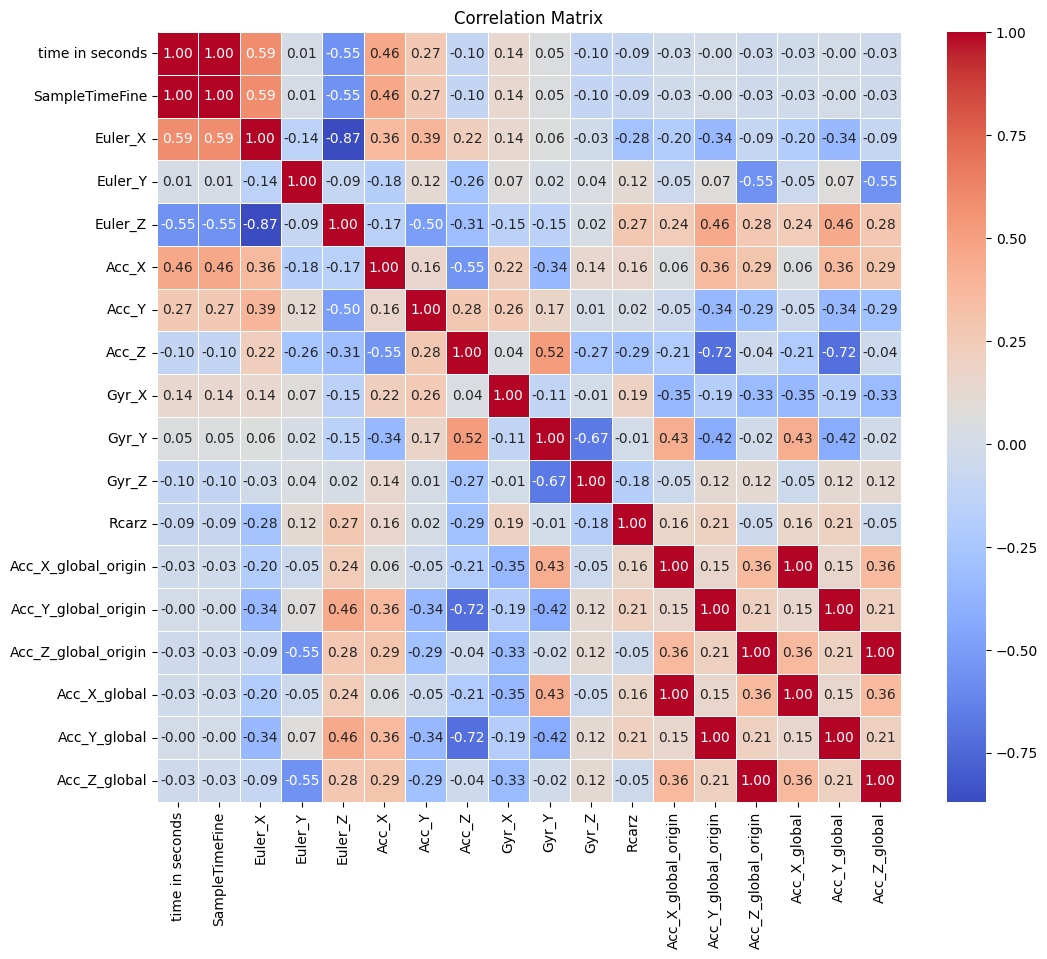

In [199]:
corr_matrix = train.corr()


print(corr_matrix)

target_corr = corr_matrix['Rcarz'].abs()
significant_corr = target_corr[target_corr > 0.1]

print("\nColumns with absolute correlation greater than 0.1 with 'Rcarz':")
print(significant_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [210]:
X_train= train[['Euler_X','Euler_Y','Euler_Z', 'Acc_Z','Acc_X_global_origin','Acc_Y_global_origin','Gyr_X', 'Gyr_Z','Acc_X_global','Acc_Y_global']]
y_train = train['Rcarz']

X_test =test[['Euler_X','Euler_Y','Euler_Z', 'Acc_Z','Acc_X_global_origin','Acc_Y_global_origin','Gyr_X', 'Gyr_Z','Acc_X_global','Acc_Y_global']]
y_test = test[['Rcarz']]

In [211]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [212]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

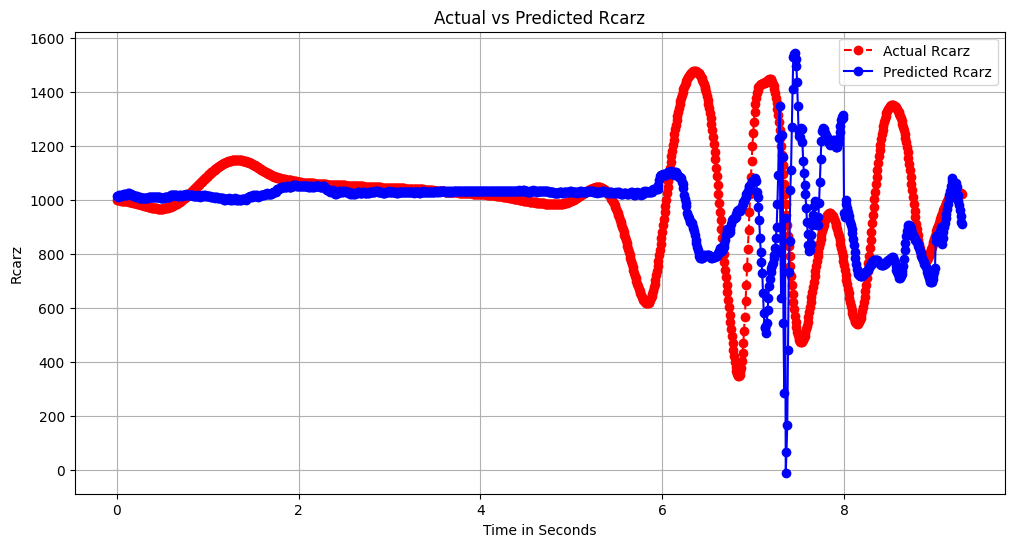

In [213]:
plot_data = pd.DataFrame({
    'time in seconds': test_data['time in seconds'].values,
    'Actual Rcarz': test_data['Rcarz'],
    'Predicted Rcarz': y_pred
})

# Plot the trains
plt.figure(figsize=(12, 6))
plt.plot(plot_data['time in seconds'], plot_data['Actual Rcarz'], label='Actual Rcarz', color='red', marker='o', linestyle='--')
plt.plot(plot_data['time in seconds'], plot_data['Predicted Rcarz'], label='Predicted Rcarz', color='blue', marker='o', linestyle='-')
plt.xlabel('Time in Seconds')
plt.ylabel('Rcarz')
plt.title('Actual vs Predicted Rcarz')
plt.legend()
plt.grid(True)
plt.show()

In [214]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 68253.18173622365
Root Mean Squared Error: 261.2530989983155


In [215]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mse_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Random Forest R-squared: {r2_rf}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Random Forest Mean Squared Error: 80449.41353406008
Root Mean Squared Error: 283.6360582402387
Random Forest R-squared: -0.9504235001820158


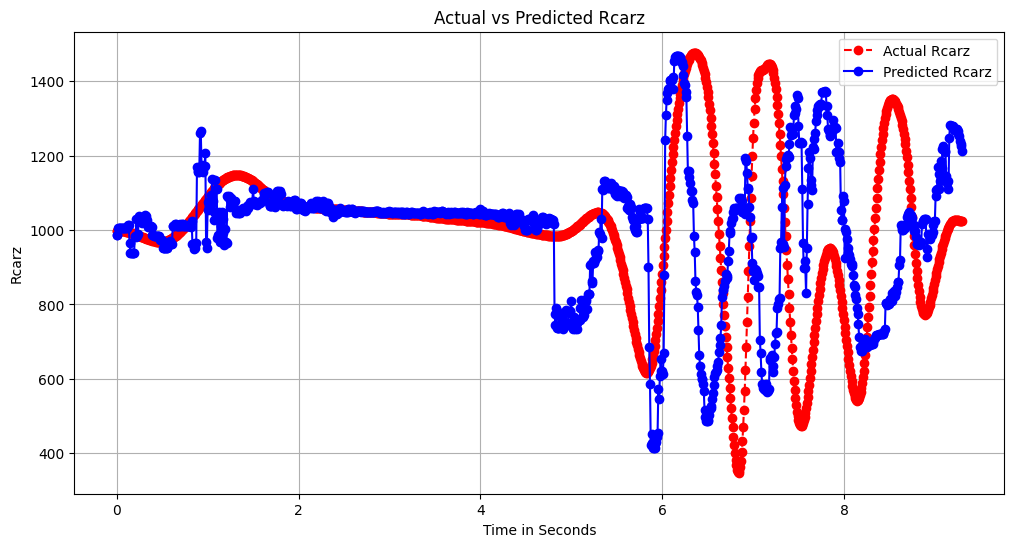

In [216]:
plot_data = pd.DataFrame({
    'time in seconds': test_data['time in seconds'].values,
    'Actual Rcarz': test_data['Rcarz'],
    'Predicted Rcarz': y_pred_rf
})

# Plot the trains
plt.figure(figsize=(12, 6))
plt.plot(plot_data['time in seconds'], plot_data['Actual Rcarz'], label='Actual Rcarz', color='red', marker='o', linestyle='--')
plt.plot(plot_data['time in seconds'], plot_data['Predicted Rcarz'], label='Predicted Rcarz', color='blue', marker='o', linestyle='-')
plt.xlabel('Time in Seconds')
plt.ylabel('Rcarz')
plt.title('Actual vs Predicted Rcarz')
plt.legend()
plt.grid(True)
plt.show()

In [217]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Predict on the test data
y_pred_gbr = gbr.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
                 

rmse = np.sqrt(mse_gbr)
print(f"Random Forest Mean Squared Error: {mse_gbr}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Random Forest R-squared: {r2_gbr}")



Random Forest Mean Squared Error: 81787.78179318935
Root Mean Squared Error: 285.985632144675
Random Forest R-squared: -0.982871031989047


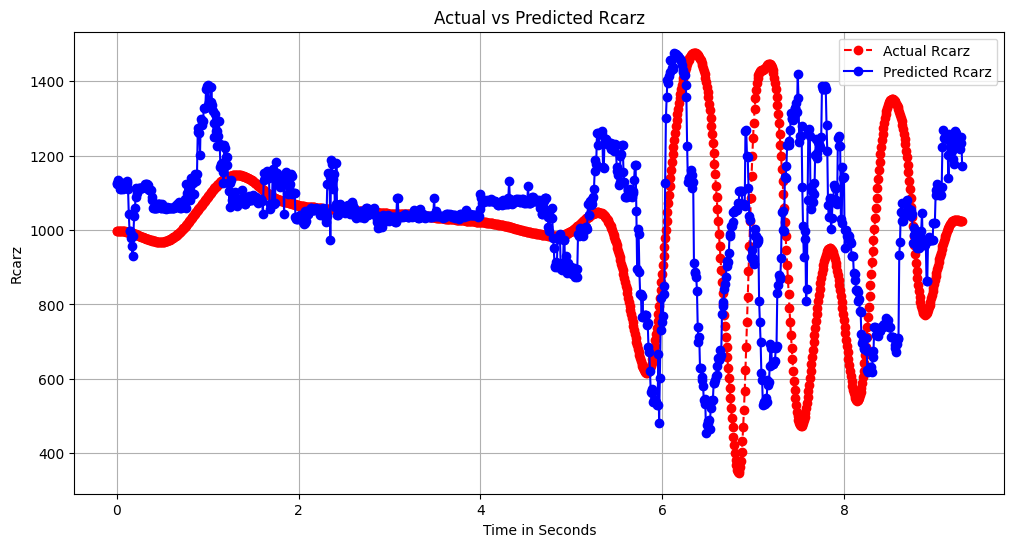

In [209]:
plot_data = pd.DataFrame({
    'time in seconds': test_data['time in seconds'].values,
    'Actual Rcarz': test_data['Rcarz'],
    'Predicted Rcarz': y_pred_gbr
})

# Plot the trains
plt.figure(figsize=(12, 6))
plt.plot(plot_data['time in seconds'], plot_data['Actual Rcarz'], label='Actual Rcarz', color='red', marker='o', linestyle='--')
plt.plot(plot_data['time in seconds'], plot_data['Predicted Rcarz'], label='Predicted Rcarz', color='blue', marker='o', linestyle='-')
plt.xlabel('Time in Seconds')
plt.ylabel('Rcarz')
plt.title('Actual vs Predicted Rcarz')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Assuming train and test are your preprocessed datasets
X_train = train[['time in seconds', 'Euler_X', 'Euler_Y', 'Euler_Z', 'Acc_Z', 'Acc_X_global_origin', 'Acc_Y_global_origin', 'Gyr_X', 'Gyr_Z', 'Acc_X_global', 'Acc_Y_global']].values
y_train = train['Rcarz'].values

X_test = test[['time in seconds', 'Euler_X', 'Euler_Y', 'Euler_Z', 'Acc_Z', 'Acc_X_global_origin', 'Acc_Y_global_origin', 'Gyr_X', 'Gyr_Z', 'Acc_X_global', 'Acc_Y_global']].values
y_test = test['Rcarz'].values

# Reshape data for LSTM input (samples, timesteps, features)
timesteps = 1  # Assuming you want to predict one timestep ahead
X_train = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])
